<IPython.core.display.Math object>

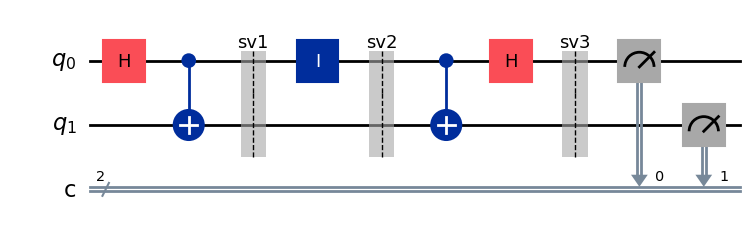

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

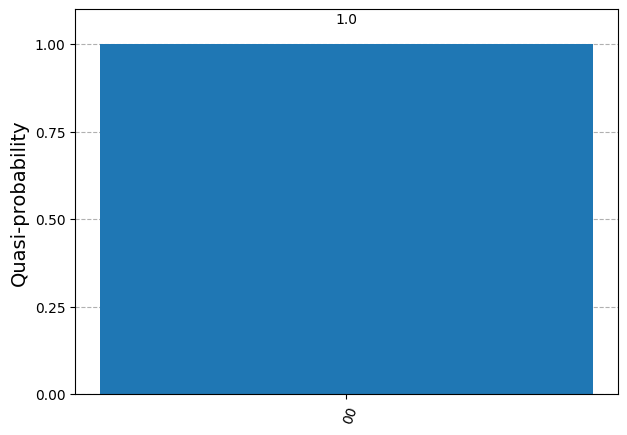

<IPython.core.display.Math object>

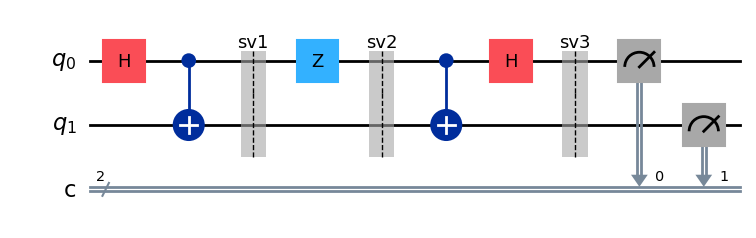

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

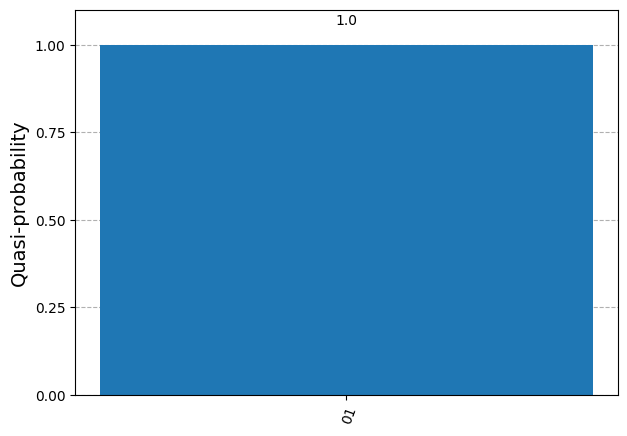

<IPython.core.display.Math object>

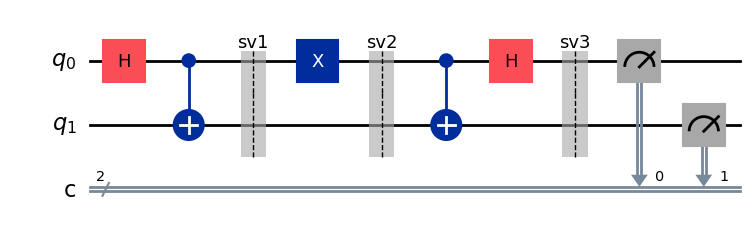

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

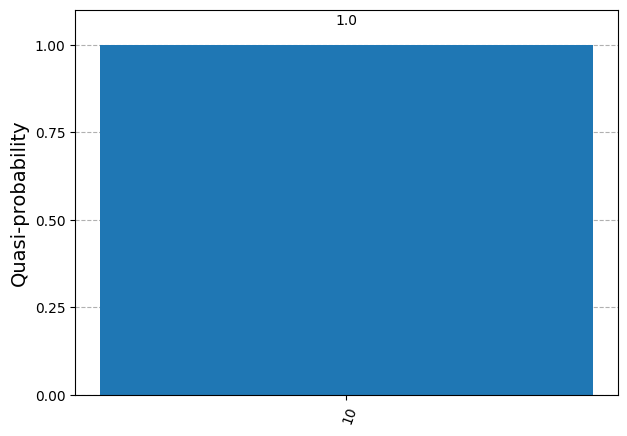

<IPython.core.display.Math object>

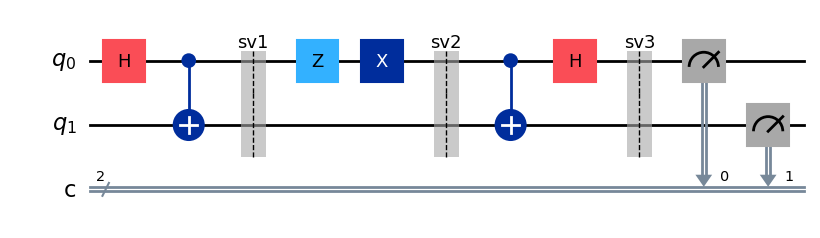

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

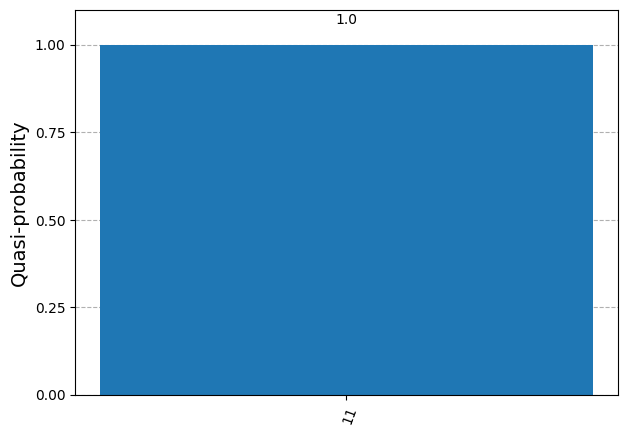

In [5]:
# superdense_coding.ipynb
# allows transmission of 2 desired bits using a single qubit
# doubles the efficiency of classical information transmission
# combined with quantum key distribution improves security in communication

from IPython.core.display import Math
from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1 - Encode two classical bits into one qubit


def superdense_coding(a, b):  # a and b are two bits of information
    qc = QuantumCircuit(
        2, 2
    )  # creates a quantum circuit with two classical bits and two qubits
    # prepare the qubits by entangling them (H and CNOT)
    qc.h(0)
    qc.cx(0, 1)
    qc.save_statevector("sv1")
    # encode the first qubit based on the values of a and b
    if a == 0 and b == 0:
        qc.id(0)
    if b == 1:
        qc.z(0)
    if a == 1:
        qc.x(0)
    qc.save_statevector("sv2")
    # decode the first qubit into two bits of information by reversing the entanglement between it and the second qubit
    qc.cx(0, 1)
    qc.h(0)
    qc.save_statevector("sv3")
    # measure the qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    backend = AerSimulator()
    qc_transpiled = transpile(qc, backend)
    result = backend.run(qc_transpiled).result()

    sv1 = result.data(0)["sv1"]
    sv2 = result.data(0)["sv2"]
    sv3 = result.data(0)["sv3"]

    display(Math((rf"\large\mathbf{{a={a},b={b}}}")))
    display(qc.draw(output="mpl"))
    display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
    display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
    display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))

    counts = result.get_counts(qc)
    display(plot_distribution(counts))


for a in [0, 1]:
    for b in [0, 1]:
        superdense_coding(a, b)
